In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


### 데이터 불러오기

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- ## datetime 
    -  날짜 + 시간
    
- ## season 
    - 1 = 봄
    - 2 = 여름 
    - 3 = 가을 
    - 4 = 겨울
- ## holiday
    - 휴일여부를 0,1로 구분
- ## workingday
    - 일하는날 (휴일과 주말x)
- ## weather
    - 1: 맑음~ 약간흐림까지의 범위
    - 2: 안개낀 흐림
    - 3: 약한 정도의 눈, 비등 자연현상
    - 4: 강한 정도의 자연현상
- ## temp 
    - 섭시 온도
- ##  atemp 
    - 체감온도 
- ## humidity 
    - 상대 습도
- ## windspeed
    - 풍속
- ## casual 
    - 예약하지 않은 고객
- ## registered 
    - 미리 예약한 고객
- ## count 
    - 총 고객 대여수  [count = casual + registered]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


- casual,registered,count변수는 train set에만 존재함
- 결측치는 존재하지 않고 train set은 10886개, test set에는 6493개가 있다.
- 대부분의 칼럼이 int와 float type이다.

- datetime 변수를 year, month, dat, hour, minute, second 변수로 나누어 저장합니다.

In [6]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [7]:
train_df['year'] = train_df['datetime'].apply(lambda x: x.year)
train_df['month'] = train_df['datetime'].apply(lambda x: x.month)
train_df['day'] = train_df['datetime'].apply(lambda x: x.day)
train_df['hour'] = train_df['datetime'].apply(lambda x: x.hour)

train_df.shape

(10886, 16)

- 12개의 칼럼이 16개의 칼럼으로 바뀐 모습을 볼 수 있다.

#### test set역시 동일하게 바꿔준다.

In [8]:
test_df['year'] = test_df['datetime'].apply(lambda x: x.year)
test_df['month'] = test_df['datetime'].apply(lambda x: x.month)
test_df['day'] = test_df['datetime'].apply(lambda x: x.day)
test_df['hour'] = test_df['datetime'].apply(lambda x: x.hour)

test_df.shape

(6493, 13)

- 9개의 칼럼이 13개의 칼럼으로 바뀐 모습을 볼 수 있다.

- test 데이터에는  casual, registered, count 변수가 없는데 casual+registered=count 임을 알 수 있다.
- train set에 casual, registered 변수를 삭제하고,  위에서 datetime 변수를 나눴기 때문에 삭제하겠다.

In [9]:
train_df = train_df.drop(['datetime', 'casual', 'registered'], axis=1)
test_df = test_df.drop(['datetime'], axis=1)

In [10]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [11]:
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


## RMSLE 모델을 수행하는 성능 평가함수를 생성

In [12]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

## Linear Regression Model

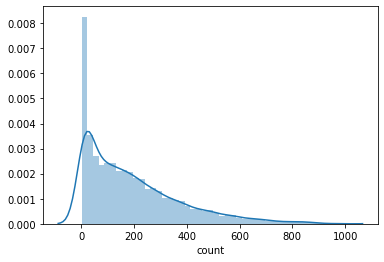

In [13]:
sns.distplot(train_df['count'])

count변수가 정규분포가 아닌 0~200 사이에 왜곡되어 있는 것을 알 수 있다.
그러므로 정규분포 형태로 만들어 주려면 로그를 적용하는 방법을 사용하겠다.

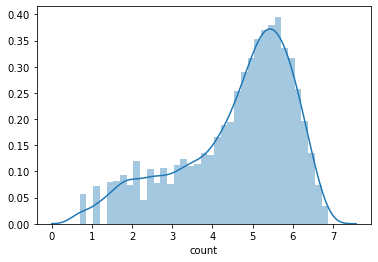

In [14]:
sns.distplot(np.log1p(train_df['count']))

In [15]:
train_df['count'] = np.log1p(train_df['count'])

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['count'], axis=1), 
                                                    train_df['count'], test_size=0.3)

In [18]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RMSLE:', rmsle(y_test_exp, pred_exp))

RMSLE: 1.014673775449846


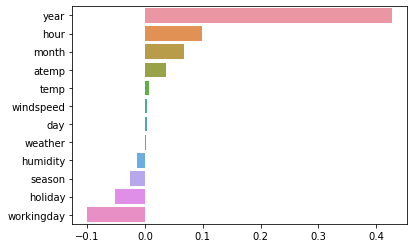

In [19]:
coef = pd.Series(lr_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

- year 변수의 회귀 계수 값이 독보적으로 큰 값을 가지고 있지만 2011,2012 두개의 값만을 가지고 있고,자전거 대여 횟수에 영향을 준다고 보기 어렵다. 
- 이러한 변수를 피처 인코딩의 원-핫 인코딩을 한 후 다시 예측해보자

In [20]:
train_df = pd.get_dummies(train_df, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])
test_df = pd.get_dummies(test_df, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [21]:
print(train_df.shape)
print(test_df.shape)

(10886, 74)
(6493, 66)


In [22]:
train_df, test_df = train_df.align(test_df, join='left', axis=1)
test_df = test_df.drop(['count'], axis=1)

In [23]:
print(train_df.shape)
print(test_df.shape)

(10886, 74)
(6493, 73)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop(['count'], axis=1), train_df['count'], test_size=0.3)

In [25]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LinearRegression RMSLE:', rmsle(y_test_exp, pred_exp))

LinearRegression RMSLE: 0.5767389092486469


In [26]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Ridge RMSLE:', rmsle(y_test_exp, pred_exp))

Ridge RMSLE: 0.5773713946547121


In [27]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Lasso RMSLE:', rmsle(y_test_exp, pred_exp))

Lasso RMSLE: 0.6280481143264514


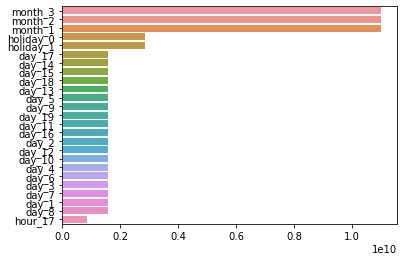

In [28]:
coef = pd.Series(lr_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

- 월, 주말/주중, 계절등에 회귀계수가 높아졌다.

### Random Forest 

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [30]:
rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

RandomForestRegressor RMSLE: 0.34477690007342904


### GBM

In [31]:
gbm_reg = GradientBoostingRegressor(n_estimators=500)
gbm_reg.fit(X_train, y_train)
pred = gbm_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('GradientBoostingRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

GradientBoostingRegressor RMSLE: 0.32782736169495635


###  XGBoost

In [32]:
from xgboost import XGBRegressor

In [33]:
xgb_reg = XGBRegressor(n_estimators=500)
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('XGBRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

XGBRegressor RMSLE: 0.33774189499993973


### LightGBM

In [34]:
from lightgbm import LGBMRegressor

In [35]:
lgbm_reg = LGBMRegressor(n_estimators=500)
lgbm_reg.fit(X_train, y_train)
pred = lgbm_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LGBMRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

LGBMRegressor RMSLE: 0.3137823248729556


## 예측(Prediction)

In [36]:
X_train = train_df.drop(['count'], axis=1)
y_train = train_df['count']
X_test = test_df
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(10886, 73)
(10886,)
(6493, 73)


In [37]:
lgbm_reg = LGBMRegressor(n_estimators=500)
lgbm_reg.fit(X_train, y_train)
pred = lgbm_reg.predict(X_test)

pred_exp = np.expm1(pred)

In [38]:
submission = pd.read_csv('sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [39]:
submission.loc[:, 'count'] = pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,10.464953
1,2011-01-20 01:00:00,3.595331
2,2011-01-20 02:00:00,2.337200
3,2011-01-20 03:00:00,2.965412
4,2011-01-20 04:00:00,1.556538
...,...,...
6488,2012-12-31 19:00:00,238.824229
6489,2012-12-31 20:00:00,154.430483
6490,2012-12-31 21:00:00,119.807797
6491,2012-12-31 22:00:00,94.999376


In [40]:
submission.to_csv('submission.csv', index=False)